In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
print("Python version")
print(sys.version)

Python version
3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import zipfile
# zip_dir = "/content/drive/MyDrive/Colab Notebooks/Brain stroke dataset csv.zip"
# extract_dir = "/content/drive/MyDrive/Colab Notebooks"

# with zipfile.ZipFile(zip_dir, "r") as zip:
#   zip.extractall(extract_dir)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Brain_Strokesdataset.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [ ]:
df.shape

(43400, 12)

In [ ]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [ ]:
df["bmi"] = df["bmi"].fillna(np.mean(df["bmi"]))
df["smoking_status"] = df["smoking_status"].fillna("Unknown")

In [ ]:
# df["temp"] = label_encoder.fit_transform(df["gender"])

In [ ]:
# df["temp"].value_counts()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

def plot_category(column):
  column_label = label_encoder.fit_transform(column)
  plt.figure(figsize=[8, 4])
  sns.countplot(x = column, data=df, hue= column_label)
  plt.title(f"{column.name.upper()} Vs COUNT")
  return

0    42617
1      783
Name: stroke, dtype: int64

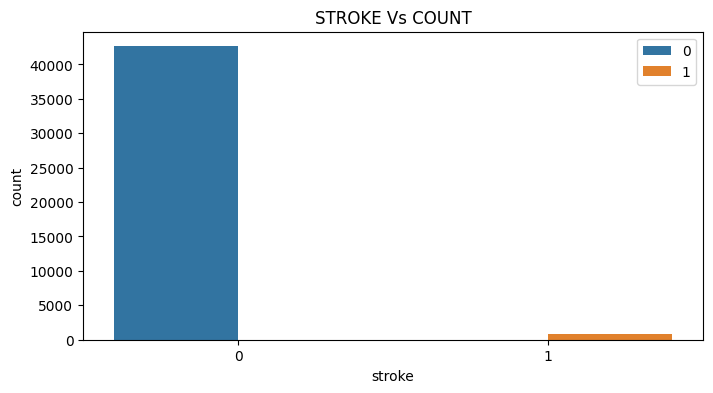

In [ ]:
plot_category(df["stroke"])
df["stroke"].value_counts()

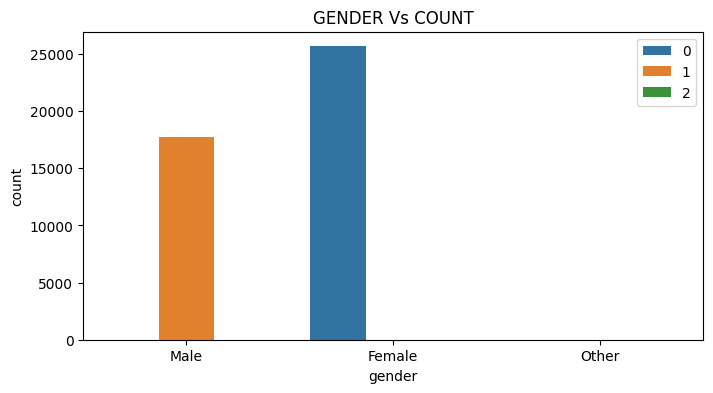

In [ ]:
plot_category(df["gender"])

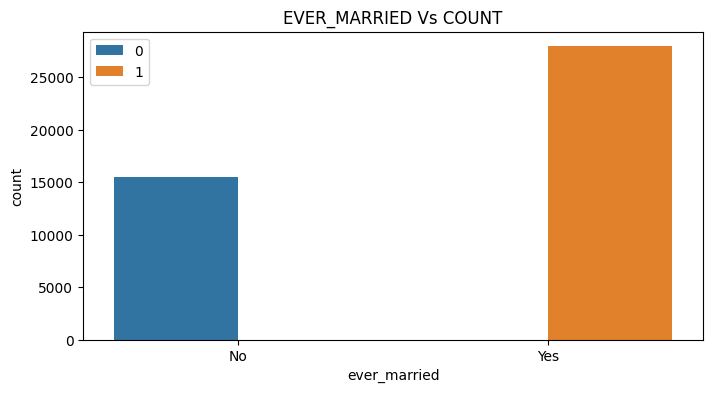

In [ ]:
plot_category(df["ever_married"])

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

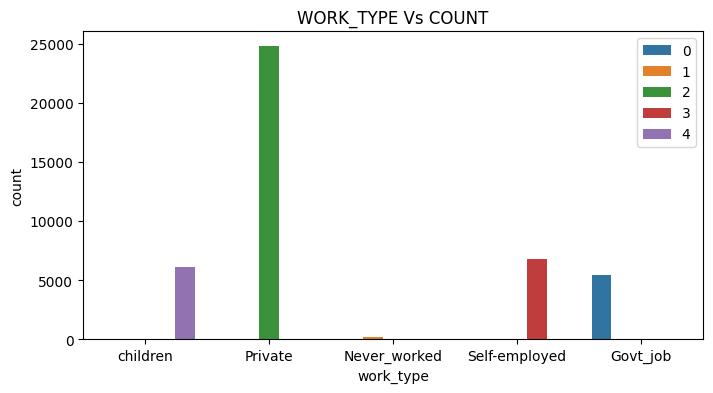

In [ ]:
plot_category(df["work_type"])
df["work_type"].value_counts()

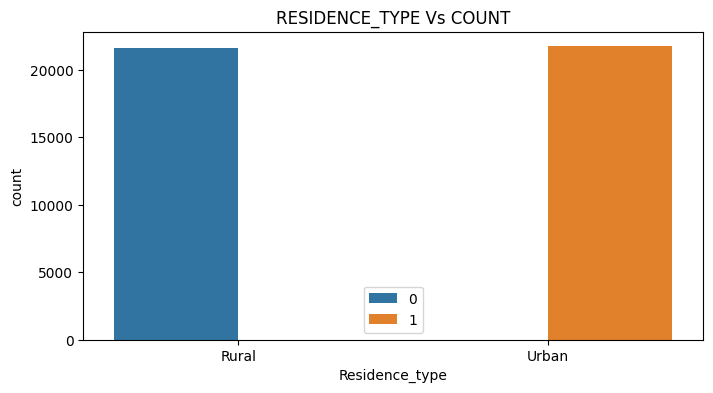

In [ ]:
plot_category(df["Residence_type"])

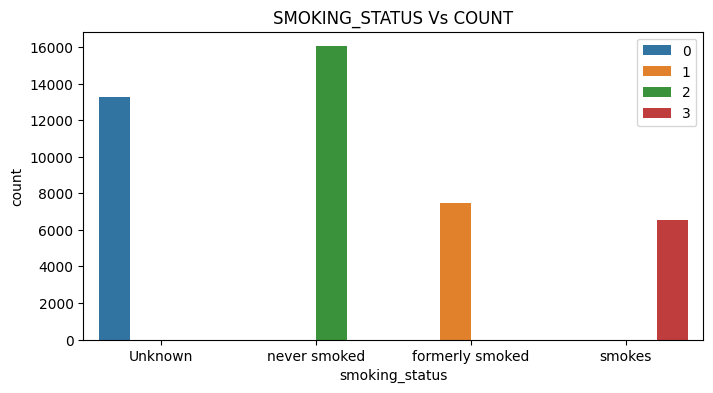

In [ ]:
plot_category(df["smoking_status"])

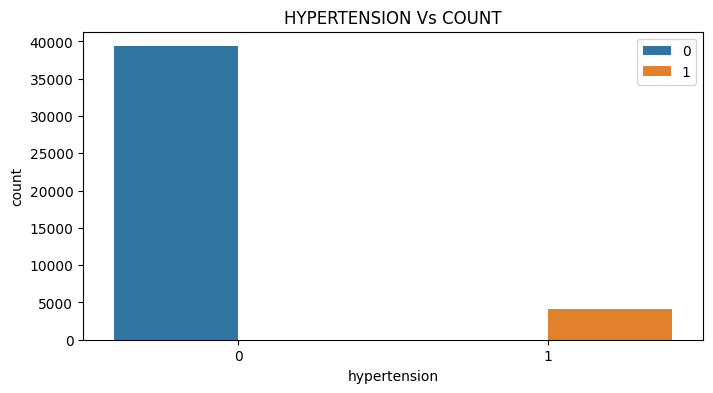

In [ ]:
plot_category(df["hypertension"])

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.638023,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,28.100000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.600000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [ ]:
def label_encoder_function(dataset):
  label_encoder = LabelEncoder()
  for column in dataset.columns:
    if dataset[column].dtype == "object":
      dataset[column] = label_encoder.fit_transform(dataset[column])
  return dataset
df = label_encoder_function(df)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,3,0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,3,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,3,0


In [ ]:
from sklearn.preprocessing import Normalizer
normalize = Normalizer()
x = df.drop(["stroke", "id"], axis=1)
y = df["stroke"]

x = normalize.fit_transform(x)

x.shape, y.shape

((43400, 10), (43400,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32, shuffle=True)

## Xgboost Model

Accuracy: 0.9813364055299539
Precision: 0.25
Recall: 0.012658227848101266
F1 Score: 0.024096385542168672


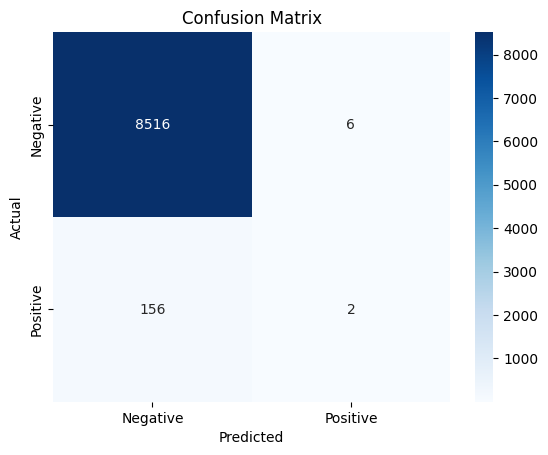

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## RandomForest Model

Accuracy: 0.9817972350230415
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


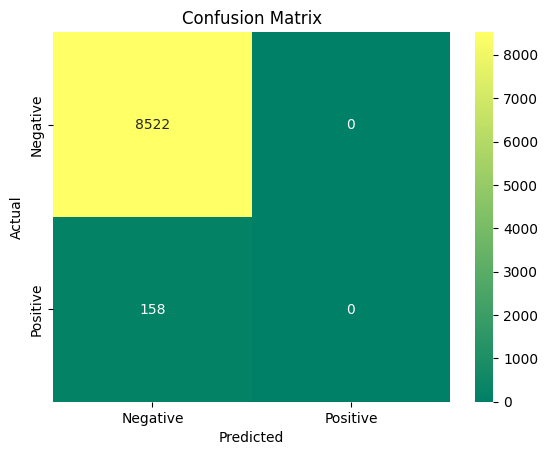

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='summer', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Neural Networks

In [ ]:
x_train.shape, y_train.shape

((34720, 10), (34720,))

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

callbacks = EarlyStopping(patience=3, monitor="val_loss", restore_best_weights=True)

tf_model = Sequential([
    Dense(units=64, activation="relu", input_dim=10),
    Dropout(0.2),
    Dense(units=64, activation="relu"),
    Dropout(0.2),
    Dense(units=1, activation="sigmoid"),
])

tf_model.summary()

tf_model.compile(optimizer=Adam(),
                 loss=BinaryCrossentropy(),
                 metrics=["accuracy"])

hist = tf_model.fit(x_train, y_train,
             epochs=100,
             validation_data=(x_test, y_test),
             batch_size=32,
             callbacks=callbacks)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                704       
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4929 (19.25 KB)
Trainable params: 4929 (19.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1085/108

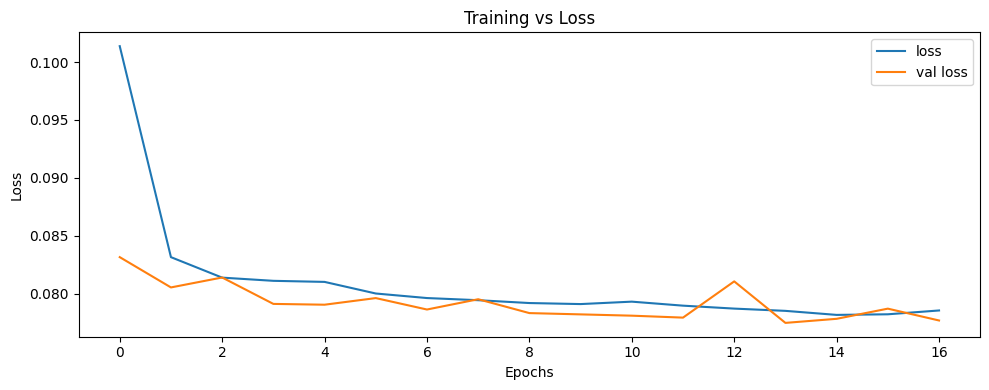

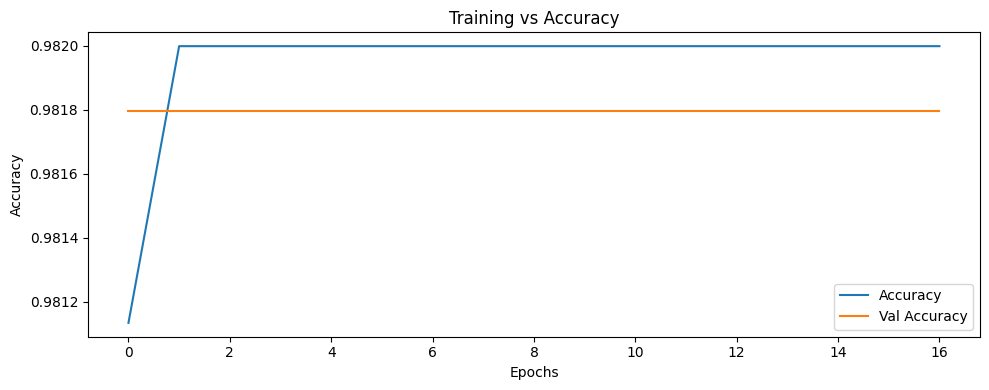

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Loss")
plt.tight_layout()
plt.legend()

plt.figure(figsize=(10, 4))
plt.plot(hist.history["accuracy"], label="Accuracy")
plt.plot(hist.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Accuracy")
plt.tight_layout()
plt.legend()

plt.show()

272/272 [==============================] - 1s 3ms/step


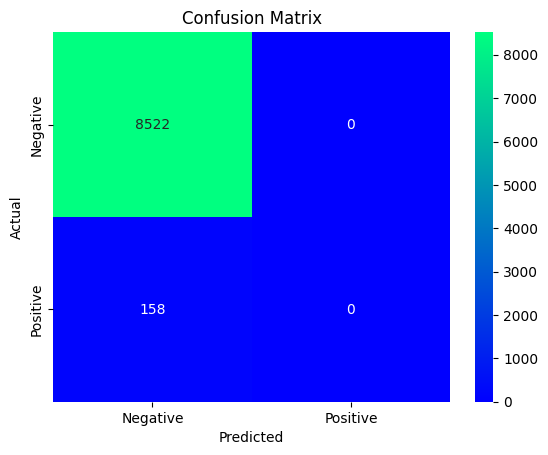

In [ ]:
y_pred = tf_model.predict(x_test)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='winter', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Prediction Function

In [ ]:
import pandas as pd

def get_data(gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status):
    data = pd.DataFrame([[
        gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status
    ]])
    return data

result = get_data(1, 3.0, 0, 0, 0, 4, 0, 95.12, 18.0, 0)
print(type(result))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
rf_model.predict(result)

array([0])

In [ ]:
import joblib

file_name = "My_XGB_Model"
joblib.dump(xgb_model, file_name)


['My_XGB_Model']

In [ ]:
loaded_model = joblib.load("/content/My_XGB_Model")

In [ ]:
loaded_model.predict(result)

array([0])